In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.datasets import untar_data
from fastai.metrics import error_rate

In [3]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

oxford flowers data set to predict what flowers and what kind

In [4]:
# untar_data needs to thze .tgz format
path = untar_data("http://www.robots.ox.ac.uk/~vgg/data/flowers/17/17flowers.tgz","/home/nbuser/courses/fast-ai/course-v3/nbs/data/flowers.tgz","/home/nbuser/courses/fast-ai/course-v3/nbs/data/flowers"); path

PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/flowers')

In [5]:
path_img = path/'flower_images'

In [6]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/flowers/flower_images/0053.png'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/flowers/flower_images/0072.png'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/flowers/flower_images/0102.png'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/flowers/flower_images/0076.png'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/flowers/flower_images/0182.png')]

In [7]:
# since we dont have the labels to extract we shall try the model of the MNIST way

tfms = get_transforms(do_flip=False)
df = pd.read_csv(path_img/'flower_labels.csv', header='infer')

data = ImageDataBunch.from_df(path_img, df, ds_tfms=tfms, size=24)


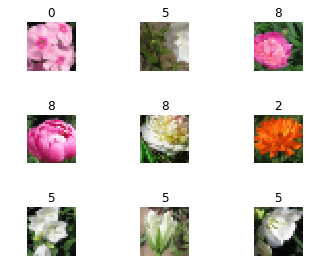

In [8]:
data.show_batch(rows=3, figsize=(5,4))

In [9]:
print(data.classes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [10]:
len(data.classes)

10

In [11]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

In [12]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [17]:
learn.fit(2)

epoch,train_loss,valid_loss,accuracy
1,1.923406,1.927861,0.333333
2,1.745768,1.902424,0.333333


In [14]:
learn.save('stage-1')

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

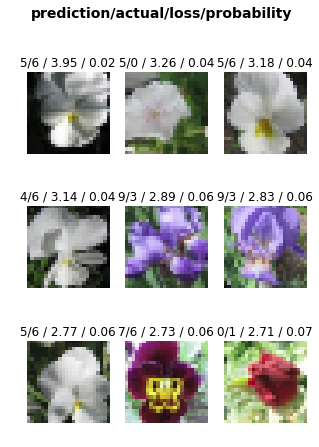

In [20]:
interp.plot_top_losses(9, figsize=(5,7))

In [21]:
interp.most_confused(min_val=2)

[(3, 9, 4), (6, 5, 3), (6, 9, 3)]

In [23]:
learn.unfreeze()

In [25]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy
1,1.627034,2.060615,0.333333


In [26]:
learn.load('stage-1');

In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


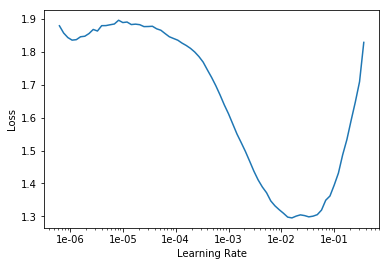

In [28]:
learn.recorder.plot()

In [33]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-02,1e-01))

epoch,train_loss,valid_loss,accuracy
1,2.755451,3065.427002,0.047619
2,4.040702,1558854.500000,0.047619


In [37]:
learn = create_cnn(data, models.resnet50, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


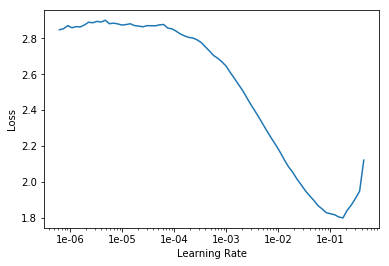

In [35]:
learn.lr_find()
learn.recorder.plot()

In [38]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy
1,2.840966,2.335572,0.119048
2,2.685160,2.117887,0.285714
3,2.474413,1.918001,0.404762
4,2.209224,1.846264,0.333333
5,2.073537,1.827946,0.333333
6,1.972943,1.800953,0.333333
7,1.880668,1.737281,0.380952
8,1.792247,1.681699,0.500000
